In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\krish\OneDrive\House_price)prediction\final_dataset')

HOUSE PRICE PREDICTION

In [4]:
df.head()

,Unnamed: 0,beds,baths,size,zip_code,price,price_per_sqft
0,0,3,2.5,2590.0,98144,795000.0,3.069498e+07
1,1,4,2.0,2240.0,98106,915000.0,4.084821e+07
2,2,4,3.0,2040.0,98107,950000.0,4.656863e+07
3,3,4,3.0,3800.0,98199,1950000.0,5.131579e+07
4,4,2,2.0,1042.0,98102,950000.0,9.117083e+07


In [5]:
df.tail()

,Unnamed: 0,beds,baths,size,zip_code,price,price_per_sqft
2011,2011,3,2.0,1370.0,98112,910000.0,6.642336e+07
2012,2012,1,1.0,889.0,98121,550000.0,6.186727e+07
2013,2013,4,2.0,2140.0,98199,1150000.0,5.373832e+07
2014,2014,2,2.0,795.0,98103,590000.0,7.421384e+07
2015,2015,3,2.0,1710.0,98133,659000.0,3.853801e+07


In [6]:
df.shape

(2016, 7)

In [7]:
df.columns

Index(['Unnamed: 0', 'beds', 'baths', 'size', 'zip_code', 'price',
       'price_per_sqft'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df = df.drop_duplicates()

In [10]:
df.isnull().sum()

Unnamed: 0        0
beds              0
baths             0
size              0
zip_code          0
price             0
price_per_sqft    0
dtype: int64

In [11]:
null_counts = df.isnull().sum()

In [12]:
features_with_null = null_counts[null_counts> 0].index
print(features_with_null)

Index([], dtype='object')


In [13]:
null_counts = df.isnull().sum()
print(null_counts)


Unnamed: 0        0
beds              0
baths             0
size              0
zip_code          0
price             0
price_per_sqft    0
dtype: int64


In [14]:
df.describe()

,Unnamed: 0,beds,baths,size,zip_code,price,price_per_sqft
count,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2.016000e+03,2.016000e+03
mean,1007.500000,2.857639,2.159970,1735.740575,98123.638889,9.636252e+05,5.915851e+07
std,582.113391,1.255092,1.002023,920.132591,22.650819,9.440954e+05,8.327952e+07
min,0.000000,1.000000,0.500000,250.000000,98101.000000,1.590000e+05,6.796117e+06
25%,503.750000,2.000000,1.500000,1068.750000,98108.000000,6.017500e+05,4.452221e+07
50%,1007.500000,3.000000,2.000000,1560.000000,98117.000000,8.000000e+05,5.529762e+07
75%,1511.250000,4.000000,2.500000,2222.500000,98126.000000,1.105250e+06,6.595389e+07
max,2015.000000,15.000000,9.000000,11010.000000,98199.000000,2.500000e+07,3.424658e+09


In [15]:
df.nunique()

Unnamed: 0        2016
beds                11
baths               16
size               879
zip_code            28
price              767
price_per_sqft    1870
dtype: int64

In [16]:
object_columns = df.select_dtypes(include='object').columns.tolist()
numerical_columns = df.select_dtypes(include=['int','float']).columns.tolist()
print("object columns:", object_columns)
print('\n')
print("Numerical columns:", numerical_columns)

object columns: []


Numerical columns: ['Unnamed: 0', 'beds', 'baths', 'size', 'zip_code', 'price', 'price_per_sqft']


In [17]:
for i in object_columns:
  print(i)
  print(df[i].unique())
  print('\n')

In [18]:
for i in object_columns:
  print(i)
  print(df[i].value_counts())
  print('\n')

In [19]:
for i in object_columns:
  print('countplot for:',i)
  plt.figure(figsize=(15,6))
  sns.countplot(df[i], data = df, palette= 'hls')
  plt.xticks(rotation =-45)
  plt.show()
  print('\n')

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in object_columns:
    print('countplot for:', i)
    plt.figure(figsize=(15, 6))
    sns.countplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=-45)
    plt.show()
    print('\n')


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in object_columns:
    print('pie plot for:', i)
    plt.figure(figsize=(15, 20))
    df[i].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Distribution of ' + i)
    plt.legend()
    plt.show()
    print('\n')


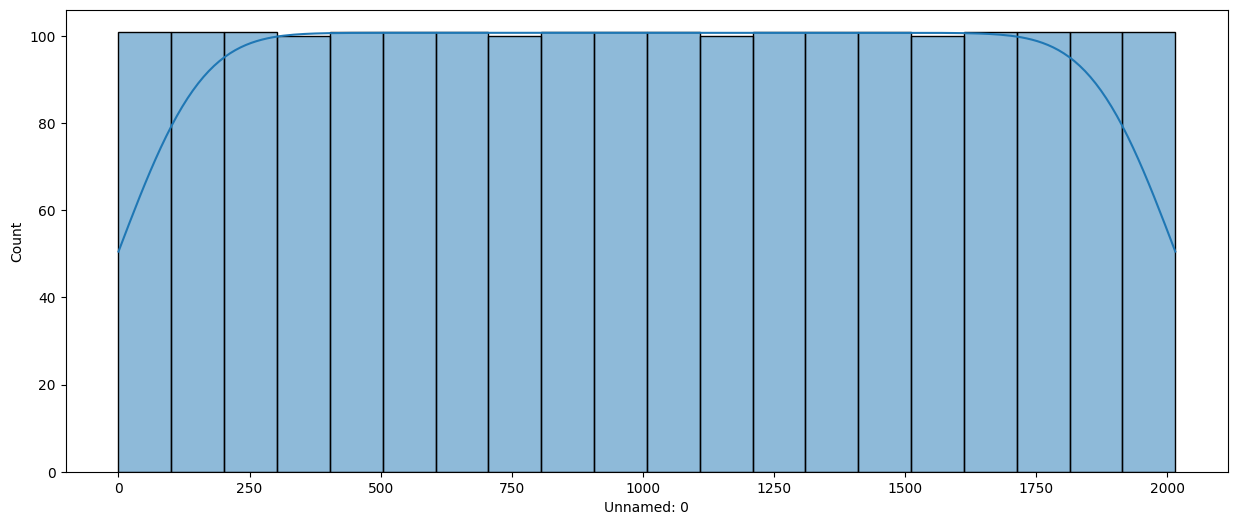

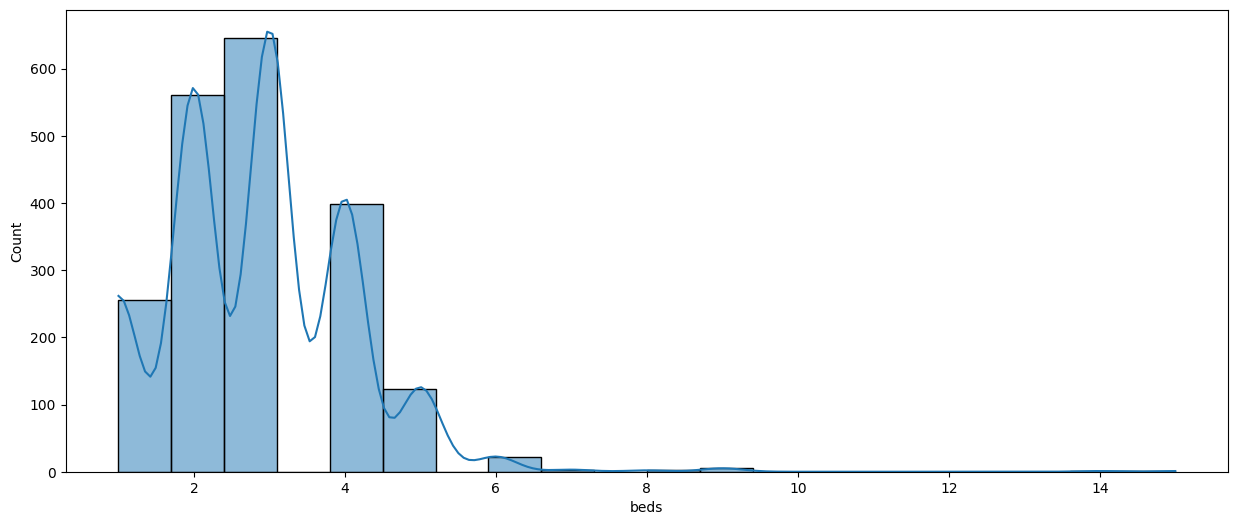

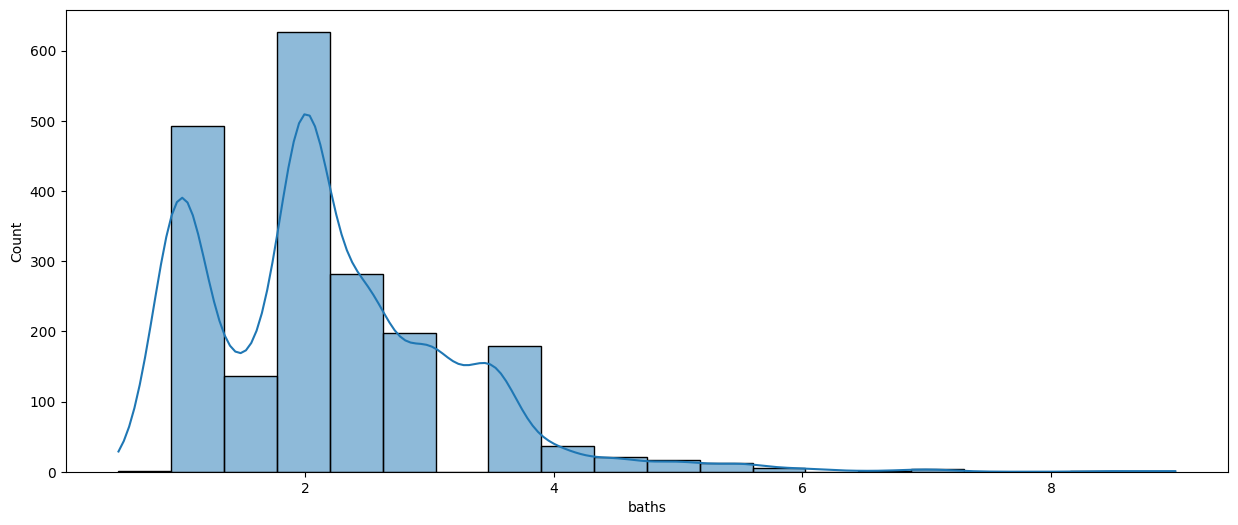

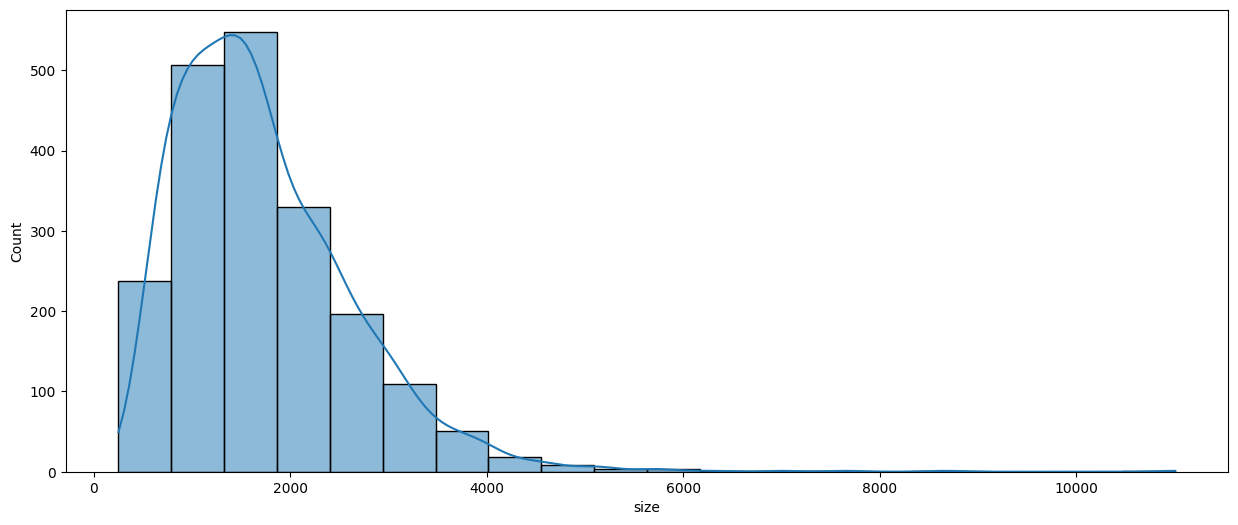

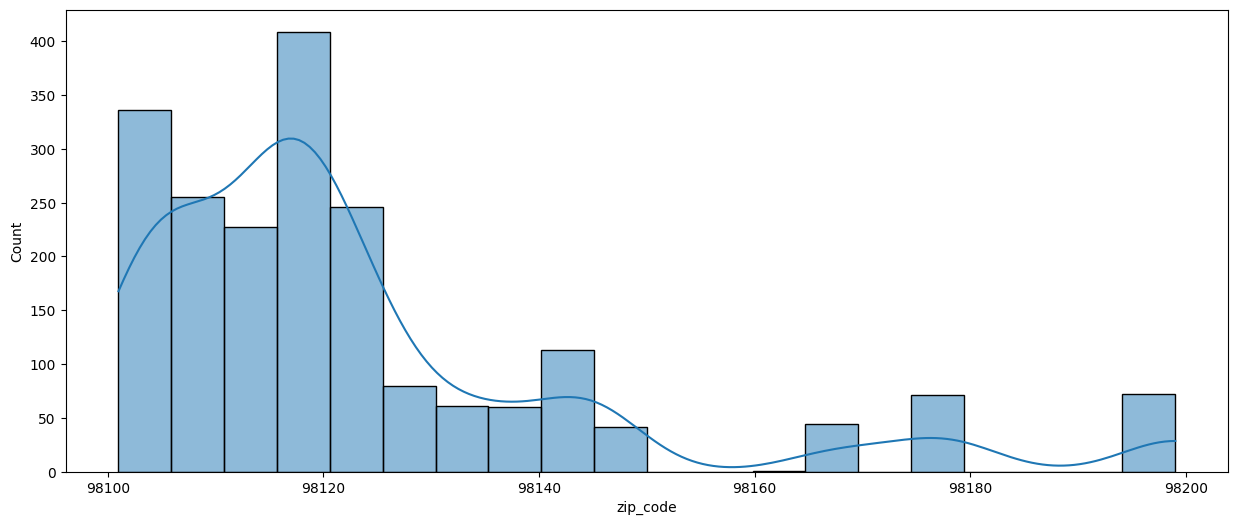

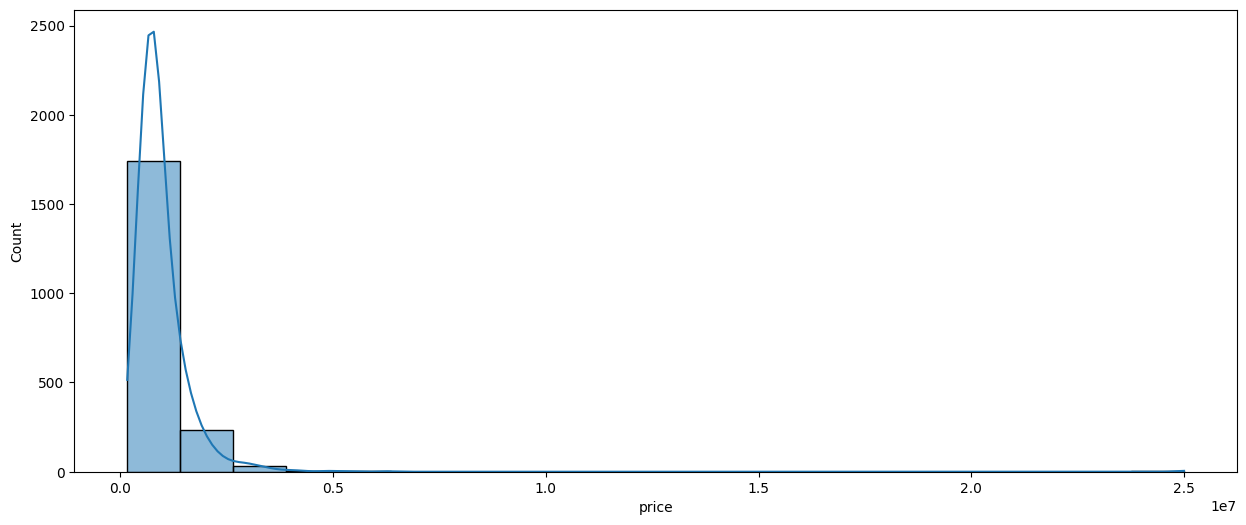

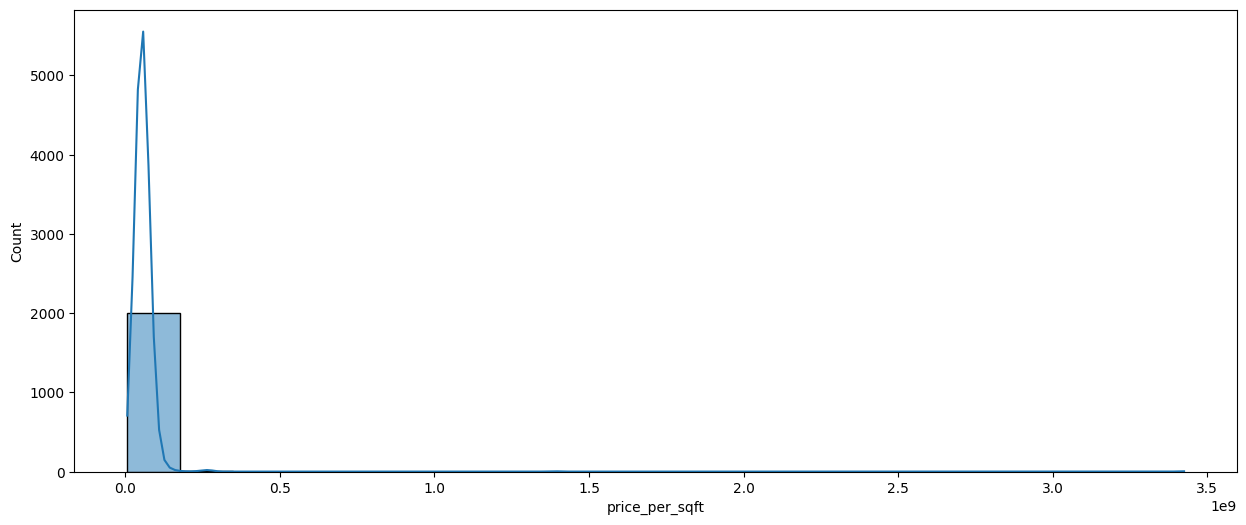

In [22]:
for i in numerical_columns:
  plt.figure(figsize=(15,6))
  sns.histplot(df[i],kde = True, bins=20, palette='hls')
  plt.xticks(rotation=0)
  plt.show()

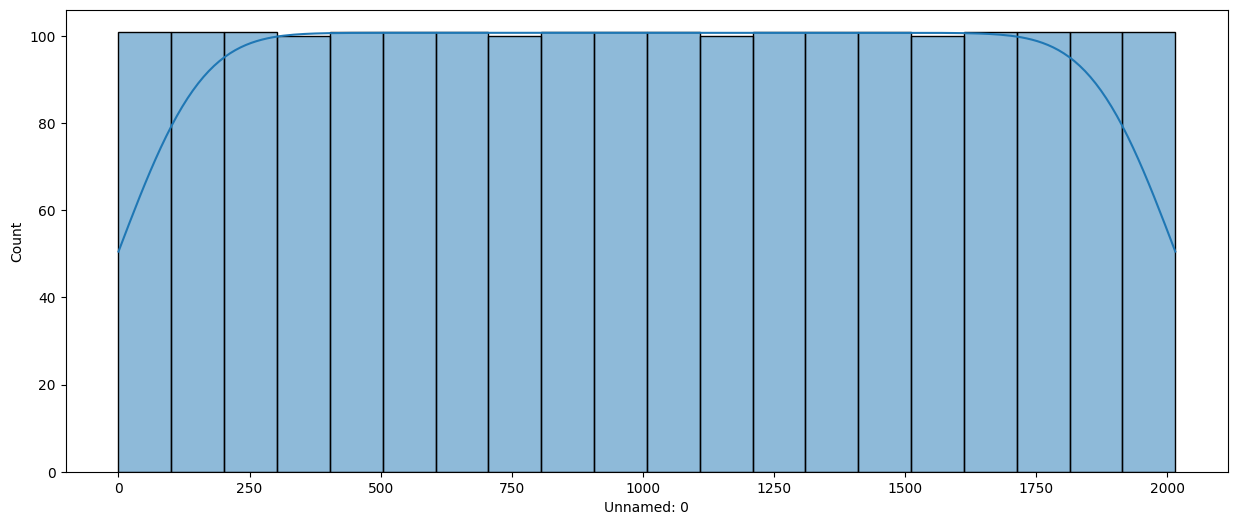

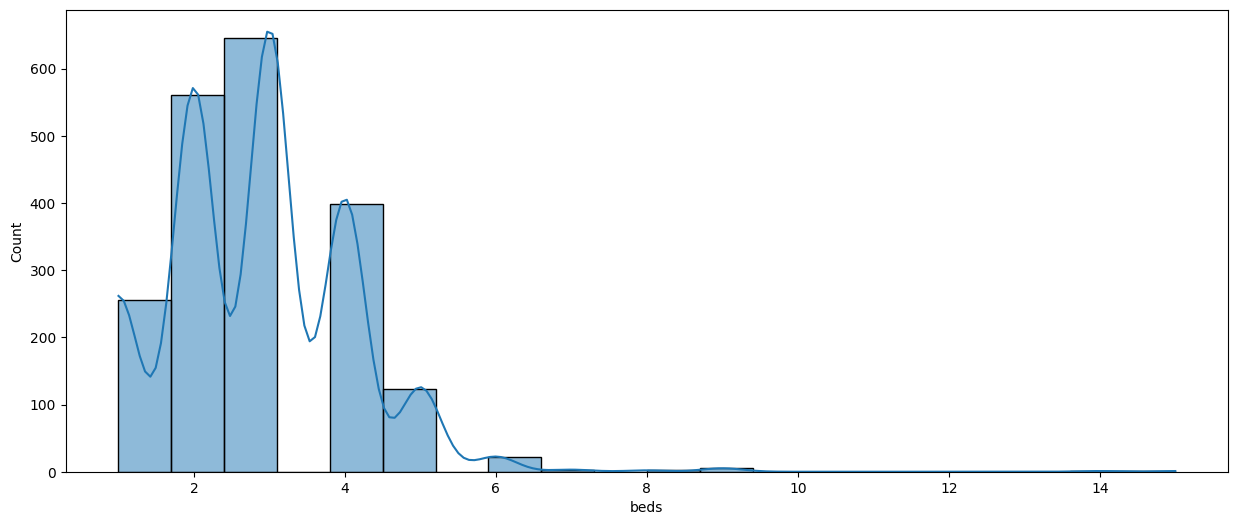

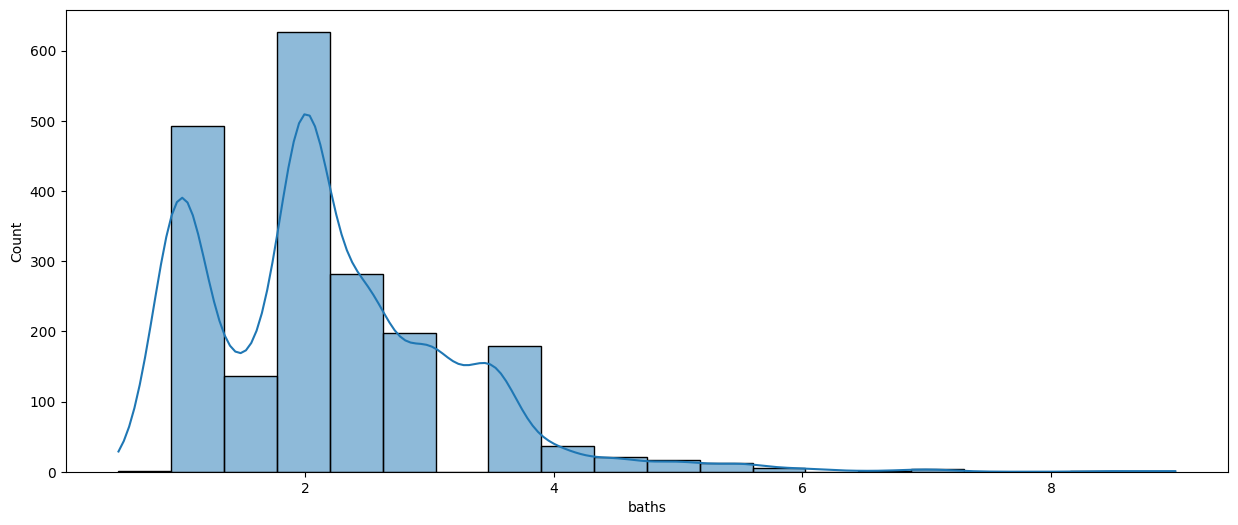

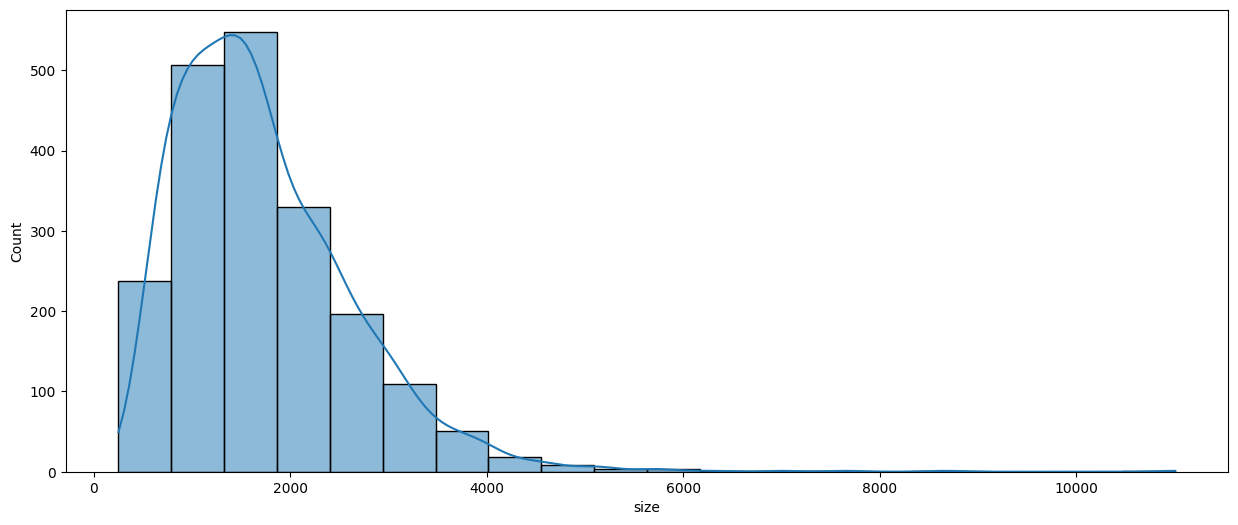

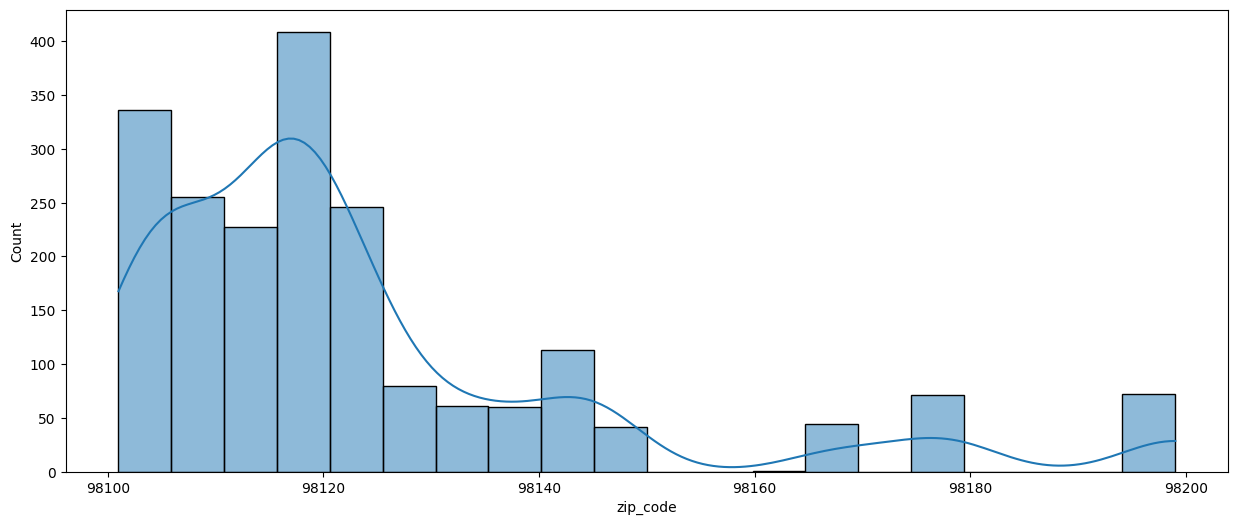

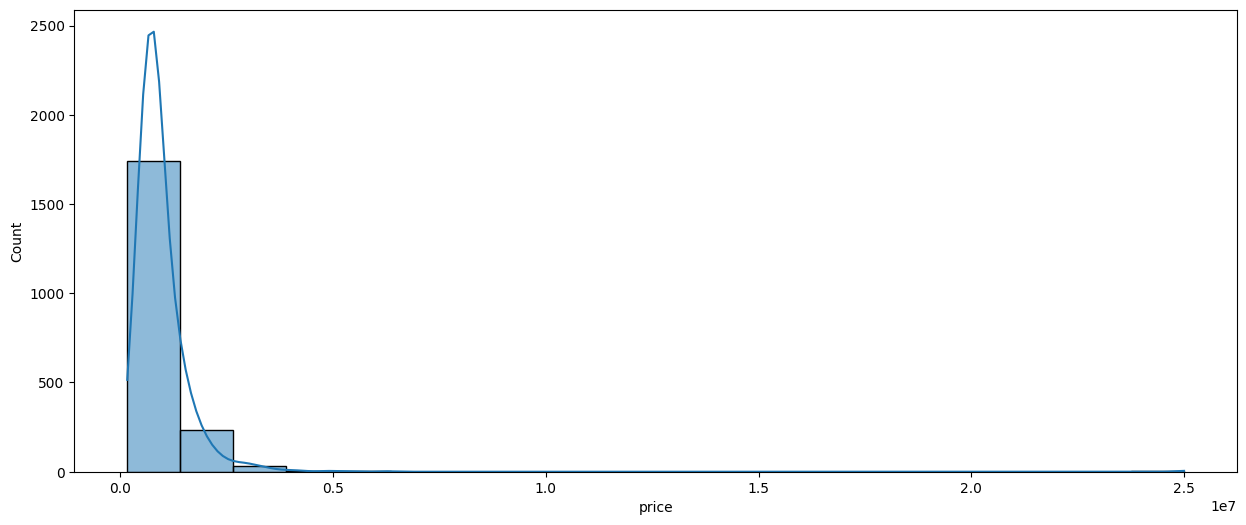

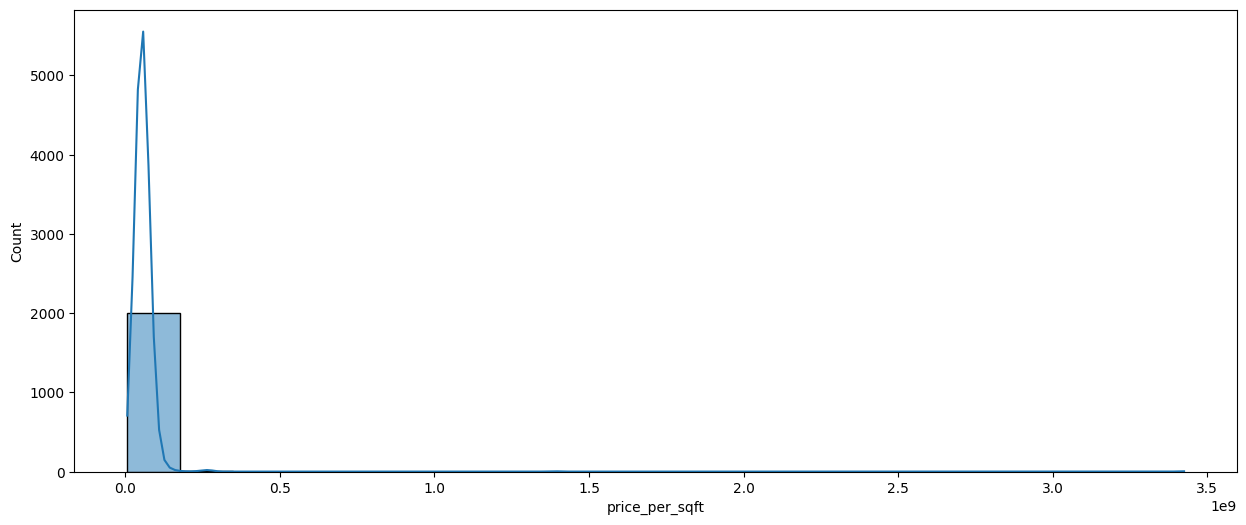

In [23]:
for i in numerical_columns:
  plt.figure(figsize=(15,6))
  sns.histplot(df[i],kde = True, bins=20, )
  plt.xticks(rotation=0)
  plt.show()

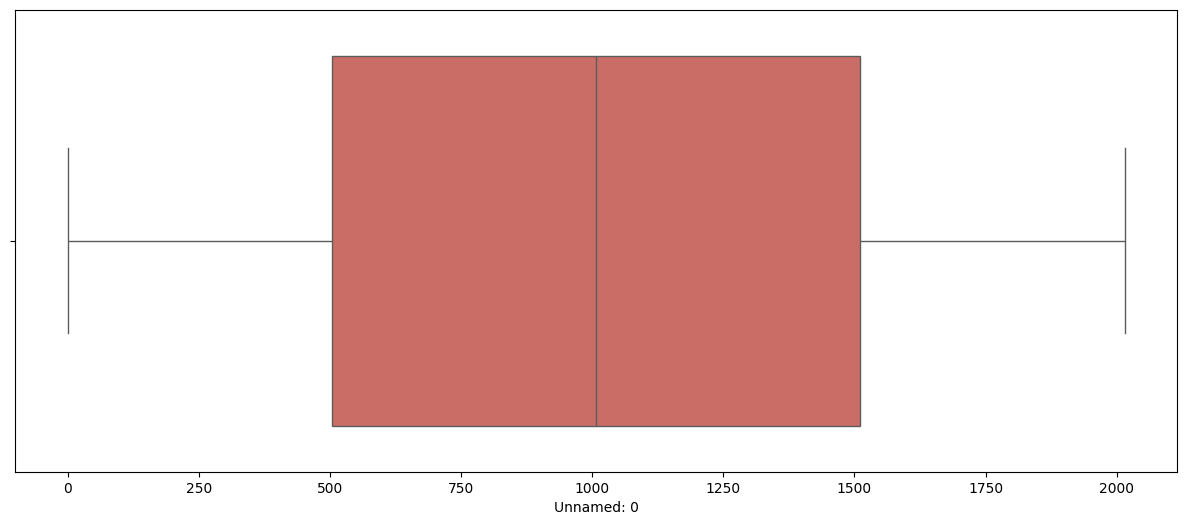

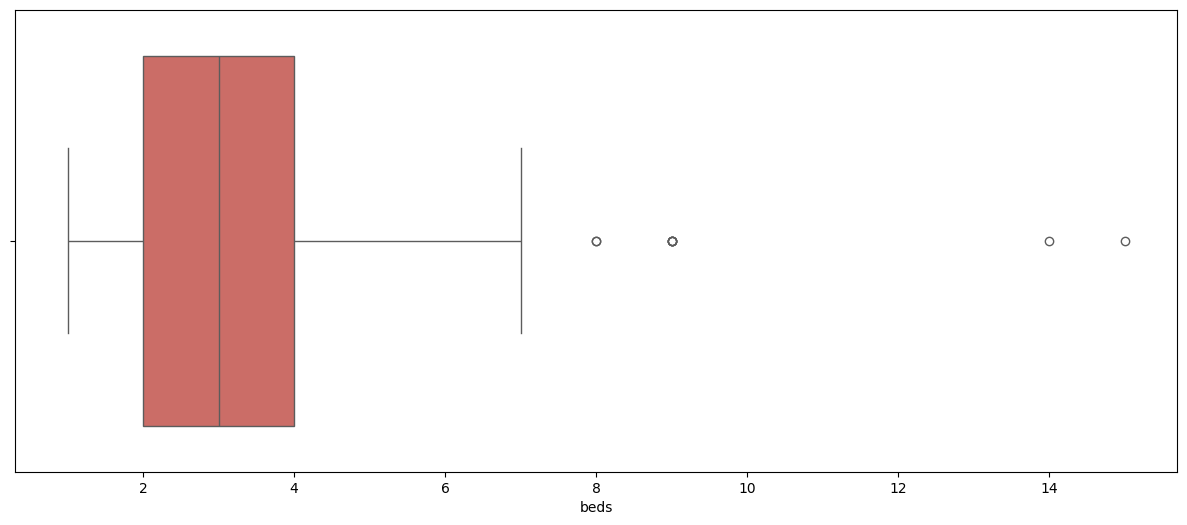

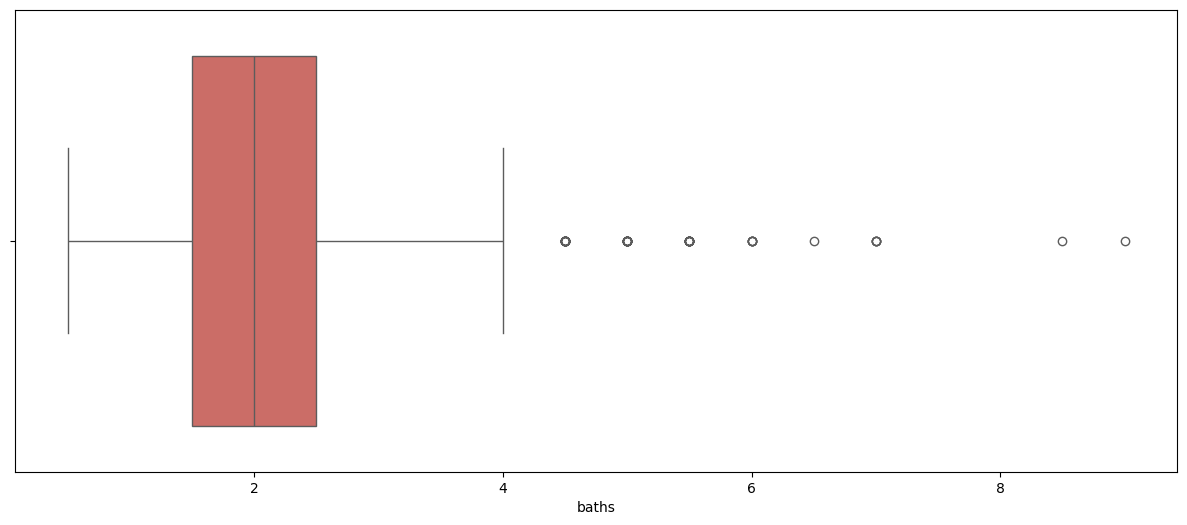

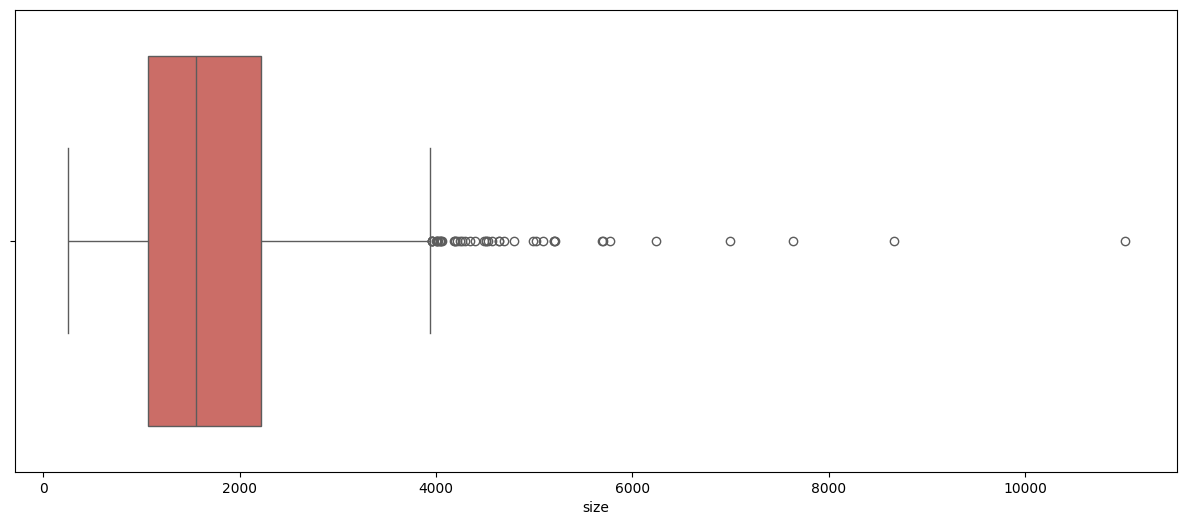

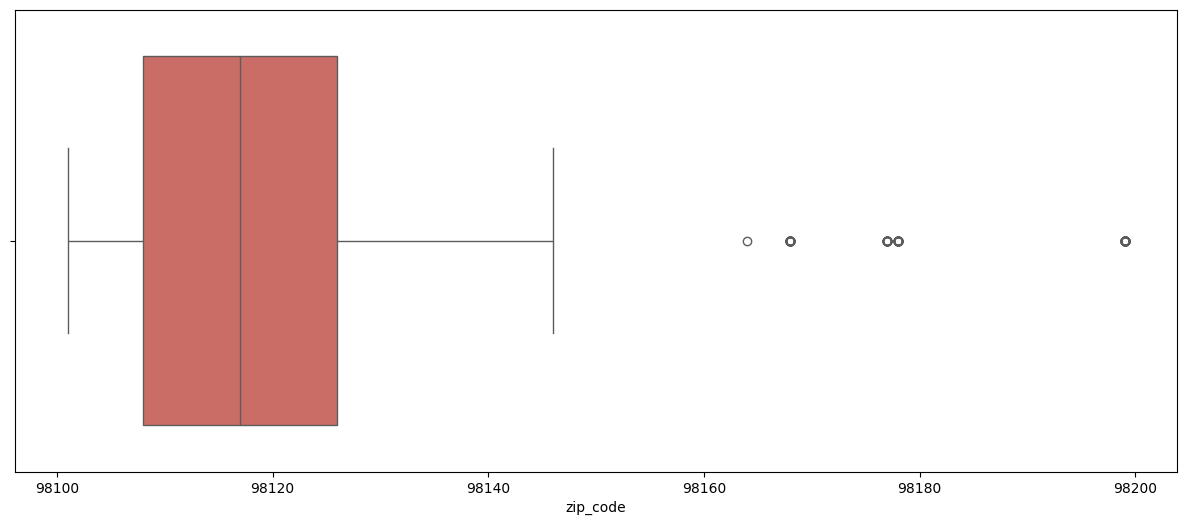

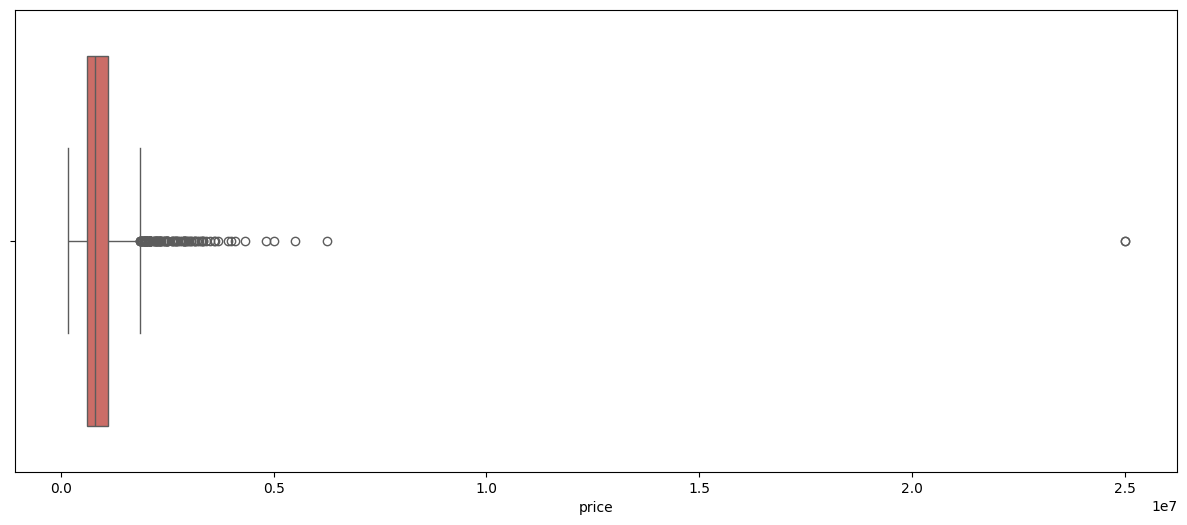

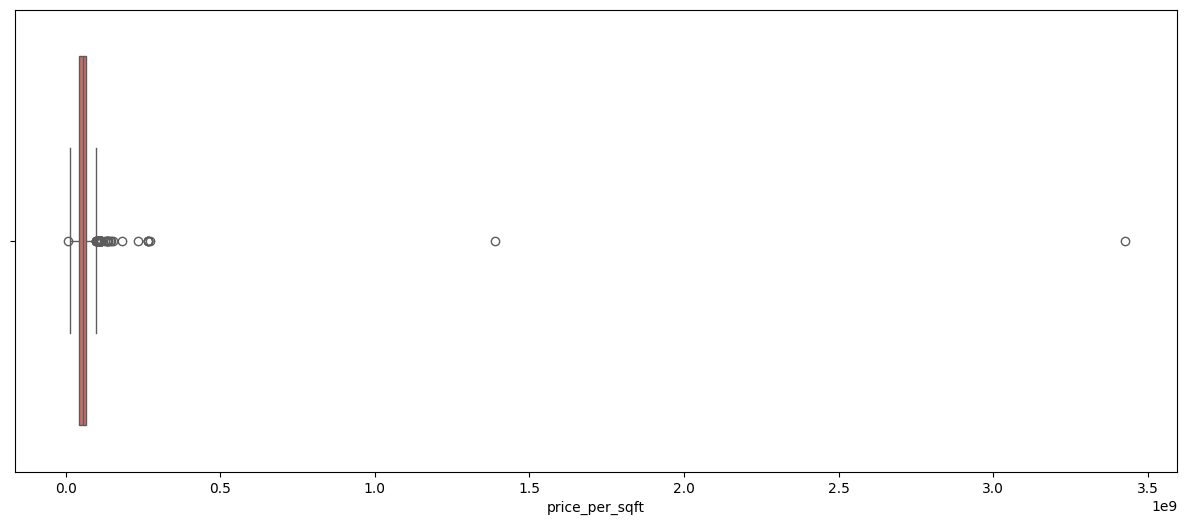

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in numerical_columns:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=df[i], data=df, palette='hls')
    plt.xticks(rotation=0)
    plt.show()


In [25]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,RidgeClassifier

In [26]:
x=df.drop(columns=['price'])
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1612, 6)
(1612,)
(404, 6)
(404,)


In [28]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

column_trans = make_column_transformer(
    (OneHotEncoder(sparse_output=False), ['beds']),
    remainder='passthrough'
)


In [29]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

In [30]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
lr.fit(x_scaled,y)

LinearRegression()

In [31]:
pipe=make_pipeline(column_trans,scaler,lr)

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Define the scaler and the regression model
scaler = StandardScaler()
lr = LinearRegression()

# Create the pipeline
pipe = Pipeline(steps=[
    ('columntransformer', column_trans),
    ('standardscaler', scaler),
    ('linearregression', lr)
])

In [33]:
OneHotEncoder(sparse_output=False)
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

In [34]:
score = r2_score(y_test, y_pred)
print(f'R^2 score: {score}')

R^2 score: 0.8093069455593881


In [35]:
import joblib
joblib.dump(lr,'linear_regression_model.pkl')

['linear_regression_model.pkl']